# Overall representation

In [22]:
import numpy as np
import pandas as pd
import pickle as pkl
from scipy.stats import hmean
import re
import matplotlib.pyplot as plt
from itertools import product

In [23]:
path2root = '..'

In [24]:
structures = []
structures.append(pkl.load(open(f'{path2root}/data/initial_features/rep_flavors.pkl', 'rb')))
structures.append(pkl.load(open(f'{path2root}/data/initial_features/rep_temp.pkl', 'rb')))
structures.append(pkl.load(open(f'{path2root}/data/initial_features/rep_times.pkl', 'rb')))
structures.append(pkl.load(open(f'{path2root}/data/initial_features/rep_health.pkl', 'rb')))
structures

[               sweet     salty      sour     spicy     other
 000095fc1d  0.000000  0.000000  0.000000  0.000000  1.000000
 00051d5b9d  0.142857  0.000000  0.142857  0.000000  0.714286
 00059b093b  0.166667  0.250000  0.000000  0.083333  0.500000
 0005fc89f7  0.000000  0.000000  0.285714  0.000000  0.714286
 0006ca31f4  1.000000  0.000000  0.000000  0.000000  0.000000
 ...              ...       ...       ...       ...       ...
 fffb3bbff2  0.277778  0.055556  0.000000  0.055556  0.611111
 fffd4b124b  0.666667  0.000000  0.000000  0.000000  0.333333
 fffd6d487a  0.250000  0.250000  0.000000  0.000000  0.500000
 fffdbfd298  0.400000  0.200000  0.000000  0.200000  0.200000
 ffffcd4444  0.000000  0.500000  0.000000  0.000000  0.500000
 
 [48284 rows x 5 columns],
                 cold   natural       hot
 000095fc1d  0.000000  1.000000  0.000000
 00051d5b9d  0.000000  0.375000  0.625000
 00059b093b  0.000000  0.238095  0.761905
 0005fc89f7  0.857143  0.142857  0.000000
 0006ca31f4  0.61

In [25]:
initial_features = pd.concat(structures, axis=1)

Remove nans

In [26]:
initial_features = initial_features[~initial_features.isna().any(axis=1)]
initial_features

,sweet,salty,sour,spicy,other,cold,natural,hot,time,health
000095fc1d,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,5,13121.211418
00051d5b9d,0.142857,0.000000,0.142857,0.000000,0.714286,0.000000,0.375000,0.625000,45,34232.921084
00059b093b,0.166667,0.250000,0.000000,0.083333,0.500000,0.000000,0.238095,0.761905,55,23336.707499
0005fc89f7,0.000000,0.000000,0.285714,0.000000,0.714286,0.857143,0.142857,0.000000,65,11371.312721
0006ca31f4,1.000000,0.000000,0.000000,0.000000,0.000000,0.615385,0.230769,0.153846,85,18536.589844
...,...,...,...,...,...,...,...,...,...,...
fffb3bbff2,0.277778,0.055556,0.000000,0.055556,0.611111,0.230769,0.461538,0.307692,85,30186.628565
fffd4b124b,0.666667,0.000000,0.000000,0.000000,0.333333,0.666667,0.333333,0.000000,20,22377.317668
fffd6d487a,0.250000,0.250000,0.000000,0.000000,0.500000,0.444444,0.333333,0.222222,50,35951.113024
fffdbfd298,0.400000,0.200000,0.000000,0.200000,0.200000,0.428571,0.428571,0.142857,95,11029.947728


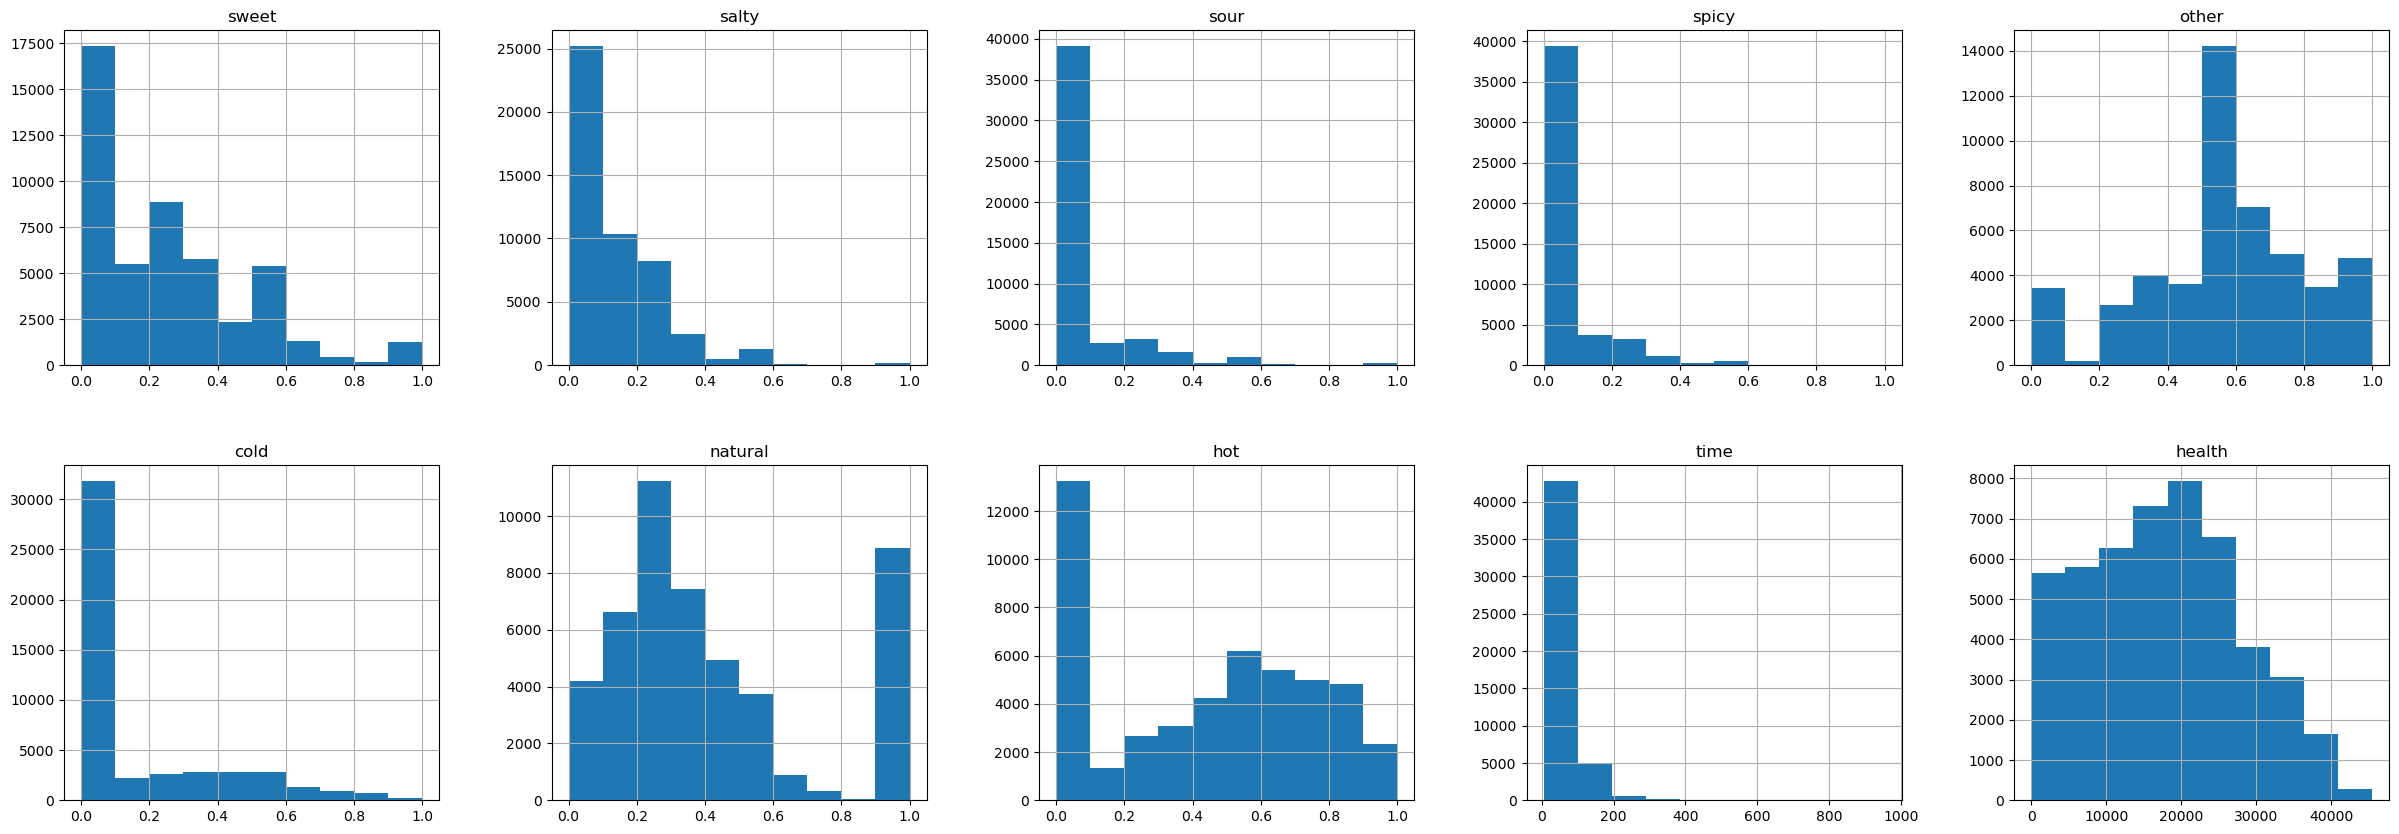

In [27]:
fig, ax = plt.subplots(2, 5, figsize=(30, 10))
initial_features.hist(ax=ax)
plt.show()

In [28]:
import sys
sys.path.append('../utils.py')
from utils import num_recipes

In [38]:
initial_features = initial_features.sample(num_recipes)

Index(['a0c10a8a8e', '6c7d70b7eb', '60d587b26b', '7e41c984d6', '419438a7cf',
       '2130f4a93c', 'ee160b7ed1', '172b582de2', '1d85365954', '0162a6bd5c',
       ...
       'd85f5e71bb', '788c420ba7', '05ea70e832', 'c0ca67aebe', '045cbf155e',
       '174be11c63', '3bac2c373a', '1724848bd1', '1edd0ac635', 'da991dd46a'],
      dtype='object', length=10000)

In [30]:
time_health = initial_features[['time', 'health']]
time_health = (time_health - time_health.min()) / (time_health.max() - time_health.min())
initial_features[['time', 'health']] = time_health
initial_features

,sweet,salty,sour,spicy,other,cold,natural,hot,time,health
7abae8bd52,0.285714,0.285714,0.000000,0.000000,0.428571,0.240000,0.200000,0.560000,0.107143,0.911573
8a705a7781,0.000000,0.142857,0.000000,0.285714,0.571429,0.000000,0.272727,0.727273,0.035714,0.619271
bcde847269,0.750000,0.000000,0.000000,0.000000,0.250000,0.117647,0.058824,0.823529,0.151786,0.613621
e848172f78,0.250000,0.000000,0.000000,0.000000,0.750000,0.000000,1.000000,0.000000,0.017857,0.530903
868482568e,0.200000,0.100000,0.000000,0.100000,0.600000,0.000000,0.333333,0.666667,0.026786,0.485809
...,...,...,...,...,...,...,...,...,...,...
c5c738babf,0.000000,0.285714,0.142857,0.000000,0.571429,0.000000,1.000000,0.000000,0.035714,0.486957
83b840d209,0.250000,0.000000,0.000000,0.000000,0.750000,0.533333,0.200000,0.266667,0.151786,0.308028
709f8db4d2,0.000000,0.000000,0.333333,0.000000,0.666667,0.421053,0.263158,0.315789,0.080357,0.312251
5a1d04bdf4,0.333333,0.000000,0.333333,0.000000,0.333333,0.000000,1.000000,0.000000,0.000000,0.811414


## Add combinations

In [31]:
sw, so, sa, sp = ([0, 1],) * 4
temp = [0, 1, 2]
prep, health = (list(range(11)),) * 2
combinations = list(product(sw, so, sa, sp, temp, prep, health))
combinations = pd.DataFrame(combinations)

In [32]:
# Remove all-flavors-0 options
combinations = combinations[(combinations[[0, 1, 2, 3]] != 0).any(axis=1)].reset_index(drop=True)

In [33]:
def comb_to_vec(comb):
    comb = comb.to_list()
    columns = ['sweet', 'salty', 'sour', 'spicy', 'other', 'cold', 'natural', 'hot',
               'time', 'health']
    values = []
    # flavors
    values += comb[:4] + [0]
    values_s = sum(values)
    values = [f / values_s for f in values]
    # temperature
    temp = [0] * 3
    temp[comb[4]] = 1
    values += temp
    # time
    values += [comb[5] / 10]
    # health
    values += [comb[6] / 10]
    return pd.Series(values, columns)

In [34]:
combinations_features = combinations.apply(comb_to_vec, axis=1)
combinations_features.index = combinations.to_records(index=False)

In [35]:
combinations_features

,sweet,salty,sour,spicy,other,cold,natural,hot,time,health
"(0, 0, 0, 1, 0, 0, 0)",0.00,0.00,0.00,1.00,0.0,1.0,0.0,0.0,0.0,0.0
"(0, 0, 0, 1, 0, 0, 1)",0.00,0.00,0.00,1.00,0.0,1.0,0.0,0.0,0.0,0.1
"(0, 0, 0, 1, 0, 0, 2)",0.00,0.00,0.00,1.00,0.0,1.0,0.0,0.0,0.0,0.2
"(0, 0, 0, 1, 0, 0, 3)",0.00,0.00,0.00,1.00,0.0,1.0,0.0,0.0,0.0,0.3
"(0, 0, 0, 1, 0, 0, 4)",0.00,0.00,0.00,1.00,0.0,1.0,0.0,0.0,0.0,0.4
...,...,...,...,...,...,...,...,...,...,...
"(1, 1, 1, 1, 2, 10, 6)",0.25,0.25,0.25,0.25,0.0,0.0,0.0,1.0,1.0,0.6
"(1, 1, 1, 1, 2, 10, 7)",0.25,0.25,0.25,0.25,0.0,0.0,0.0,1.0,1.0,0.7
"(1, 1, 1, 1, 2, 10, 8)",0.25,0.25,0.25,0.25,0.0,0.0,0.0,1.0,1.0,0.8
"(1, 1, 1, 1, 2, 10, 9)",0.25,0.25,0.25,0.25,0.0,0.0,0.0,1.0,1.0,0.9


## Save

In [36]:
initial_features_dict = {'recipes': initial_features,
                         'combinations': combinations_features}
initial_features_dict

{'recipes':                sweet     salty      sour     spicy     other      cold  \
 7abae8bd52  0.285714  0.285714  0.000000  0.000000  0.428571  0.240000   
 8a705a7781  0.000000  0.142857  0.000000  0.285714  0.571429  0.000000   
 bcde847269  0.750000  0.000000  0.000000  0.000000  0.250000  0.117647   
 e848172f78  0.250000  0.000000  0.000000  0.000000  0.750000  0.000000   
 868482568e  0.200000  0.100000  0.000000  0.100000  0.600000  0.000000   
 ...              ...       ...       ...       ...       ...       ...   
 c5c738babf  0.000000  0.285714  0.142857  0.000000  0.571429  0.000000   
 83b840d209  0.250000  0.000000  0.000000  0.000000  0.750000  0.533333   
 709f8db4d2  0.000000  0.000000  0.333333  0.000000  0.666667  0.421053   
 5a1d04bdf4  0.333333  0.000000  0.333333  0.000000  0.333333  0.000000   
 d36737a784  0.000000  0.000000  0.000000  0.000000  1.000000  0.000000   
 
              natural       hot      time    health  
 7abae8bd52  0.200000  0.560000  

In [37]:
pkl.dump(initial_features_dict, open(f'{path2root}/data/initial_features/initial_features_dict.pkl', 'wb'))

In [49]:
data_df = pkl.load(open(f'{path2root}/data/data_df.pkl', 'rb'))
data_df = data_df.loc[initial_features.index]
pkl.dump(data_df, open(f'{path2root}/data/data_df_filtered.pkl', 'wb'))